# House Price Prediction Kaggle Contest

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [0]:
df_train = pd.read_csv('drive/My Drive/Pytorch_DataSet/house-prices/cleaned_train.csv')
df_test = pd.read_csv('drive/My Drive/Pytorch_DataSet/house-prices/cleaned_test.csv')
y_test = pd.read_csv('drive/My Drive/Pytorch_DataSet/house-prices/sample_submission.csv')

In [0]:
y_test = y_test['SalePrice'].values

In [4]:
"""
# For train file

for col in df_train.columns:
  print(df_train[col].isnull().sum())

# For test file

for col in df_test.columns:
  print(df_test[col].isnull().sum())

"""

'\n# For train file\n\nfor col in df_train.columns:\n  print(df_train[col].isnull().sum())\n\n# For test file\n\nfor col in df_test.columns:\n  print(df_test[col].isnull().sum())\n\n'

In [0]:
cat_cols = []

for col in df_train.columns:
  if df_train[col].dtype == 'O':
    cat_cols.append(col)

In [6]:
cat_cols

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleCondition']

In [0]:
# For train file

for col in df_train.columns:
  if df_train[col].dtype == 'O':
    df_train[col] = df_train[col].astype('category')

# For test file

for col in df_test.columns:
  if df_test[col].dtype == 'O':
    df_test[col] = df_test[col].astype('category')


In [0]:
# df_train.info()

In [0]:
# df_test.info()

In [10]:
"""
print(len(df_test['GarageType'].cat.categories))
print(df_test['GarageType'].cat.categories)
print(df_test['GarageType'].dtype)
"""

"\nprint(len(df_test['GarageType'].cat.categories))\nprint(df_test['GarageType'].cat.categories)\nprint(df_test['GarageType'].dtype)\n"

In [11]:
# Checking different categories for category columns
cols_to_be_removed = []

for col in cat_cols:
  print(col, len(df_train[col].cat.categories), len(df_test[col].cat.categories))

  if len(df_train[col].cat.categories) != len(df_test[col].cat.categories):
    cols_to_be_removed.append(col)
    
  # For train columns
  df_train[col] = df_train[col].cat.codes.values

  # For test columns
  df_test[col] = df_test[col].cat.codes.values



MSZoning 5 5
LotShape 4 4
LotConfig 5 5
Neighborhood 25 25
BldgType 5 5
HouseStyle 8 7
RoofStyle 6 6
Exterior1st 15 13
Exterior2nd 16 15
MasVnrType 4 4
ExterQual 4 4
Foundation 6 6
BsmtQual 4 4
BsmtExposure 4 4
BsmtFinType1 6 6
BsmtFinType2 6 6
HeatingQC 5 5
KitchenQual 4 4
FireplaceQu 6 6
GarageType 6 6
GarageFinish 3 3
SaleCondition 6 6


In [0]:
"""
Now removing those columns from categorical columns whose length of
categories dont match with train and test columns.
As, those columns can't be used for one hot encoding because then dimensions will be different.
"""

for col in cols_to_be_removed:
  cat_cols.remove(col)

In [13]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [14]:
cat_cols

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'RoofStyle',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleCondition']

## Splitting into features and labels

In [0]:
# For training 

X = df_train[['MSSubClass','LotFrontage', 'HouseStyle',
       'OverallCond', 'YearRemodAdd',
       'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces','GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch']].values

X_cat = df_train[['MSZoning','LotShape','LotConfig','Neighborhood','BldgType','RoofStyle',
 'MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure','BsmtFinType1',
 'HeatingQC','KitchenQual','FireplaceQu','GarageType','GarageFinish','SaleCondition']]  


y = df_train['SalePrice'].values
y = np.log(y)

In [0]:
# For test

X_test = df_test[['MSSubClass','LotFrontage', 'HouseStyle',
       'OverallCond', 'YearRemodAdd',
       'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces','GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch']].values

X_test_cat = df_test[['MSZoning','LotShape','LotConfig','Neighborhood','BldgType','RoofStyle',
 'MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure','BsmtFinType1',
 'HeatingQC','KitchenQual','FireplaceQu','GarageType','GarageFinish','SaleCondition']]  

y_test = np.log(y_test)

In [17]:
# Applying One Hot Encoder

from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 

# For Training

X_cat_data = onehotencoder.fit_transform(X_cat).toarray()
print("Training")
print(X_cat_data.shape, type(X_cat_data))
print(X_cat_data)

# For testing

X_test_cat_data = onehotencoder.transform(X_test_cat).toarray()
print("Training")
print(X_test_cat_data.shape, type(X_test_cat_data))
print(X_test_cat_data)


Training
(1460, 108) <class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Training
(1459, 108) <class 'numpy.ndarray'>
[[0. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [18]:
# Merging the encoded values with real X

# For train
X = np.concatenate((X,X_cat_data),axis=1)
print(X.shape)

# For test

X_test = np.concatenate((X_test,X_test_cat_data),axis=1)
print(X_test.shape)

(1460, 133)
(1459, 133)


In [19]:
input_data = xgb.DMatrix(data=X,label=y)
input_data

In [0]:
# Splitting the training data set into train and validation set

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.07,random_state=32)

In [21]:
X_train.shape , X_val.shape

((1357, 133), (103, 133))

In [22]:
len(X_train), len(X_val)

(1357, 103)

In [23]:
# Applying normalization on train, val and test sets
"""
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X_train = sc1.fit_transform(X_train)
X_val = sc1.transform(X_val)
X_test = sc1.transform(X_test)

sc2 = StandardScaler()
y_train = sc2.fit_transform(y_train.reshape(-1,1))
y_val = sc2.transform(y_val.reshape(-1,1))
"""

'\nfrom sklearn.preprocessing import StandardScaler\nsc1 = StandardScaler()\nX_train = sc1.fit_transform(X_train)\nX_val = sc1.transform(X_val)\nX_test = sc1.transform(X_test)\n\nsc2 = StandardScaler()\ny_train = sc2.fit_transform(y_train.reshape(-1,1))\ny_val = sc2.transform(y_val.reshape(-1,1))\n'

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear')

In [25]:
"""
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor(n_estimators=1000,max_depth=15,n_jobs=-1,bootstrap=True,random_state=50)
rg.fit(X_train,y_train)

preds = rg.predict(X_val)

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_val, preds))
print("RMSE: %f" % (rmse))
"""

'\nfrom sklearn.ensemble import RandomForestRegressor\nrg = RandomForestRegressor(n_estimators=1000,max_depth=15,n_jobs=-1,bootstrap=True,random_state=50)\nrg.fit(X_train,y_train)\n\npreds = rg.predict(X_val)\n\nfrom sklearn.metrics import mean_squared_error\n\nrmse = np.sqrt(mean_squared_error(y_val, preds))\nprint("RMSE: %f" % (rmse))\n'

In [26]:
xg_reg.fit(X_train,y_train)

[11:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
preds = xg_reg.predict(X_val)

In [28]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_val, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.177533


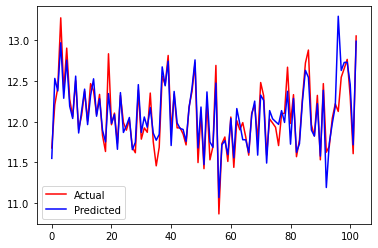

In [29]:
plt.plot(y_val,'r',label='Actual')
plt.plot(preds,'b',label='Predicted')
plt.legend()

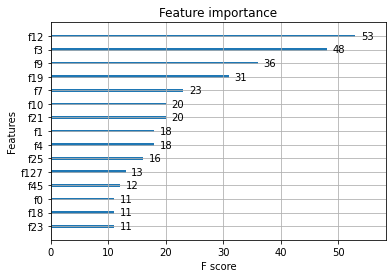

In [30]:
xgb.plot_importance(xg_reg,max_num_features=15)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [0]:
# for testing

y_preds = xg_reg.predict(X_test)

In [0]:
#y_preds = sc2.inverse_transform(y_preds.reshape(-1,1))

In [0]:
y_preds = np.exp(y_preds)

In [35]:
y_preds

array([122336.76, 143974.55, 189076.17, ..., 150716.34, 118368.24,
       226164.02], dtype=float32)

In [36]:
pd.options.display.float_format = '{:.2f}'.format
submission = pd.DataFrame({'id':df_test['Id'],'SalePrice':y_preds.flatten().astype('double')})
submission

,id,SalePrice
0,1461,122336.76
1,1462,143974.55
2,1463,189076.17
3,1464,189419.08
4,1465,177229.58
...,...,...
1454,2915,85829.24
1455,2916,83940.13
1456,2917,150716.34
1457,2918,118368.24


In [0]:
submission.to_csv('house_price_prediction.csv',index=False)